# Discussion 14: Convergence of Heavyball, Comparisons

In this discussion, we will explore
* Convergence rate of heavyball
* Comparisons with other methods

---

Last time we introduced **heavyball method**, also referred to as **steepest descent with momentum**, defined by the following:

$$ \begin{align*}
    \mathbf{p}_k &= \nabla f_k + \beta \mathbf{p}_{k-1} \\
    \mathbf{x}_{k+1} &= \mathbf{x}_k - \alpha_k \mathbf{p}_k
\end{align*} $$

where $\beta\in(0,1)$ is called the *momentum parameter*. We showed an example of this method improving upon the convergence of steepest descent, but we didn't really give a mathematical justification for this. That is our goal today, but first let us recall a few facts about steepest descent.

### Different Formulations of Heavy Ball Method

Oftentimes Heavy Ball Method is presented in a different manner:

$$x_{k+1} = x_k - \alpha \nabla f(x_k) + \beta(x_k - x_{k-1})$$

## Convergence rate of steepest descent

For quadratic functions, the fixed step steepest descent algorithm admits the inequality

$$ \frac{\|\mathbf{x}_{k+1}-\mathbf{x}^*\|}{\|\mathbf{x}_{k}-\mathbf{x}^*\|} \le \frac{\lambda_{max}(Q)-\lambda_{min}(Q)}{\lambda_{max}(Q) + \lambda_{min}(Q)} \equiv \frac{\kappa-1}{\kappa+1} $$

provided $\alpha$ is chosen optimally, where $\kappa\equiv \frac{\lambda_{max}(Q)}{\lambda_{min}(Q)}\ge 1$ is the condition number of $Q$.

**What is the significance of this inequality?** Shows linear convergence of steepest descent for quadratic functions since if $\kappa>1$, $\frac{\kappa-1}{\kappa+1} = 1 - \frac{2}{\kappa+1}<1$. Recall also that this bound is  achieved by choosing

$$\alpha = \frac{2}{\lambda_{max}(Q) + \lambda_{min}(Q)} $$

This can be extneded to some non-quadratic functions if they're "nice" enough: the strict requirement is for $f$ to be a $C^2$ function that's **strongly convex** and **strongly smooth**.

A function is strongly convex if

$$ f(\mathbf{y}) \ge f(\mathbf{x}) +\nabla f(\mathbf{x})^T(\mathbf{y}-\mathbf{x}) + \frac{\mu}{2}\|\mathbf{y}-\mathbf{x}\|^2 $$

holds for all $\mathbf{x},\mathbf{y}\in\mathbb{R}^n$ and some constant $\mu > 0$ (strictly!). A similar expression exists for strongly smooth, i.e. 

$$ f(\mathbf{y}) \le f(\mathbf{x}) +\nabla f(\mathbf{x})^T(\mathbf{y}-\mathbf{x}) + \frac{L}{2}\|\mathbf{y}-\mathbf{x}\|^2 $$

for some $L\ge\mu$.

This is because we have $\lambda_{\min}\|x\|^2 \le x^T B x \le \lambda_{\max}\|x\|^2$ for a positive definite matrix $B$. with eigenvalues $\lambda_{\min}$ and $\lambda_{\max}$.

**What do these two inequalities tell us?**

They give strict upper $(L)$ and lower $(\mu)$ bounds on the eigenvalues of the Hessian, rather than allowing arbitrarily small or large values.

If $f$ is quadratic, $L=\lambda_{max}(Q)$ and $\mu=\lambda_{min}(Q)$: **all quadratic functions are strongly convex/smooth**.

If bounds of $L$ and $\mu$ can be determined for a non-quadratic function, the result generalizes nicely: choosing

$$ \alpha = \frac{2}{L+\mu} \implies \frac{\|\mathbf{x}_{k+1}-\mathbf{x}^*\|}{\|\mathbf{x}_{k}-\mathbf{x}^*\|} \le \frac{L-\mu}{L + \mu} $$

and so we still get linear convergence since $L\ge\mu$.

**How do we find the bounds $L$ and $\mu$ for a non-quadratic function?**

this may be difficult

**Interpreting L, $\mu$**

If $L\gg\mu$ above, the constant $r\equiv \frac{L-\mu}{L+\mu}$ is very close to 1, which can be interpreted as the error not improving very much each iteration, resulting in slow convergence.


## Convergence rate of Heavyball

It is shown in lecture by an argument based on treating the iteration update as a [fixed point iteration](https://en.wikipedia.org/wiki/Fixed-point_iteration) that a very similar bound can be obtained for the heavyball update. If we choose

$$ \alpha = \frac{4}{(L^{1/2} + \mu^{1/2})^2},\quad \beta = \frac{(L^{1/2} - \mu^{1/2})^2}{(L^{1/2} + \mu^{1/2})^2} \qquad \implies\qquad  \frac{\|\mathbf{x}_{k+1}-\mathbf{x}^*\|}{\|\mathbf{x}_{k}-\mathbf{x}^*\|} \le \frac{L^{1/2}-\mu^{1/2}}{L^{1/2} + \mu^{1/2}} $$

which is the same as the above with the replacement $L\to L^{1/2}$, $\mu\to\mu^{1/2}$. For the same values of $L,\mu$, the ratio $r$ for heavyball is usually smaller than the ratio $r$ for steepest descent, resulting in faster convergence. Note that the convergence for heavyball is **still linear**, but since the ratio of consecutive errors is smaller, the iteration will converge more quickly.

We demonstrate this difference below by comparing steepest descent to heavyball with these optimal fixed parameters on the (quadratic) function we looked at last time:

$$ f(x,y) = x^2 + 10y^2 $$

which has $L=20$, $\mu=2$.

## Descent Direction of Heavy Ball?

Steepest descent is a descent direction: we have $p_k = - \nabla f_k$, so $p_k^T \nabla f_k < 0$.

**Heavy Ball is not a descent method**: Consider a simple example: let $p_0 = [100,0]$, $\nabla f_0 = [1,0]$, $\beta = 0.5$.

Here, $p_k = - \nabla f_k - \beta p_{k-1}$.

Then
$$p_{k} = -[1,0] - [-50,0] = [49,0]$$
so
$$p_{k}^T \nabla f > 0$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x,y: x**2 + 10*y**2
df = lambda x,y: np.array([2*x, 20*y])
Q = np.array([[2,0],[0,20]])

In [3]:
%%time
x = np.array([10,1])
path_SD = [x]
tol = 1e-8
alpha = 2/(20+2)  # optimal step size
max_steps = 1000
dx = df(x[0],x[1])
i=0
while np.linalg.norm(dx)>tol and i<max_steps:
    xnew = x - alpha*dx
    path_SD.append(xnew)
    x = xnew
    i += 1
    dx = df(x[0],x[1])
    
path_SD=np.array(path_SD)
print(f'After {i} iterations, approximate minimum is {f(x[0],x[1])} at {x}')

After 109 iterations, approximate minimum is 1.103200318212885e-17 at [ 3.16687445e-09 -3.16687445e-10]
Wall time: 13 ms


In [4]:
def plot_path(path, func, title, window=[-10,10,-5,5], contours=50, skip=1):
    '''Plots path defined in (N,2) array "path" on a contour plot of "func" in window "window"'''
    plt.figure(figsize=(10,5),dpi=150)
    X = np.linspace(window[0],window[1],300)
    Y = np.linspace(window[2],window[3],300)
    Xmesh, Ymesh = np.meshgrid(X,Y)
    Z = func(Xmesh,Ymesh)
    CS = plt.contour(Xmesh, Ymesh, Z, contours, cmap='jet')
    plt.clabel(CS,inline_spacing=0,fmt='%d')
    plt.axis(window)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)

    for i in range(path.shape[0]-1): # iterate through steps
        if i%skip==0:
            # only plot arrows every "skip" iterations
            plt.arrow(path[i,0],path[i,1],path[i+1,0]-path[i,0],path[i+1,1]-path[i,1],
                      color='k',length_includes_head=True)
    plt.show()

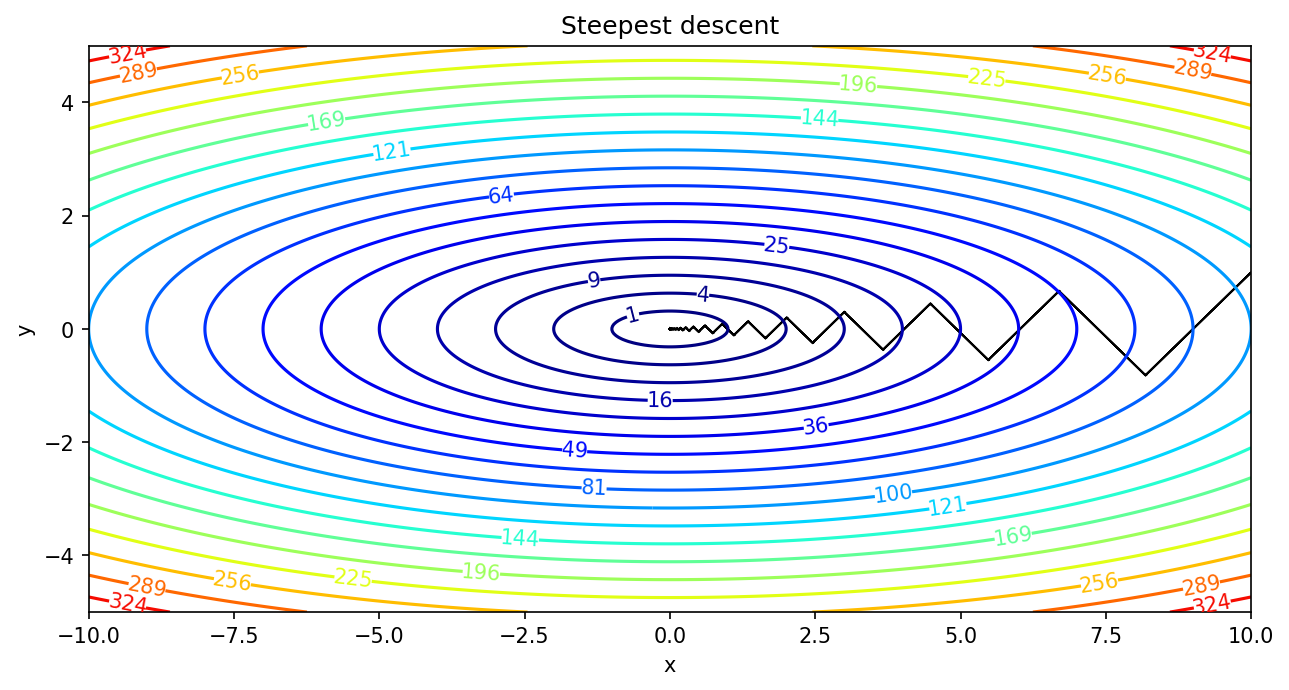

In [5]:
plot_path(path_SD,f,'Steepest descent', contours=np.arange(1,20)**2)

We see this takes quite a few iterations even for a quadratic function. If we investigate the ratio

$$ r = \frac{L-\mu}{L+\mu} = \frac{20-2}{20+2} \approx 0.81818 $$

we see the error in each iteration is still more than $80\%$ of the previous iteration, quite large. We write a function below to determine this value:

In [6]:
def approx_error_ratio(path, minimizer, numToAvg=10, showPlot=False):
    '''Given a path defined by an iteration and a known minimizer, approximates the limit of the ratio of errors'''
    err = np.linalg.norm(path-np.array(minimizer),axis=1) # ||x_k-x*||=e_k
    
    # if converged in very few steps, return infinite order
    if len(err)<=2:
        return np.inf
    
    rr = np.zeros(len(err)-2)
    for i in range(len(err)-2):
        rr[i] = err[i+1]/err[i]
    
    if numToAvg>len(rr):
        # if not enough iterations to average, just average all
        r = np.mean(rr)
    else:
        # return mean of last few iterations
        r = np.mean(rr[-numToAvg:])
        
    # plot
    if showPlot:
        plt.plot(rr)
        plt.plot(rr*0+r)
        plt.xlabel('k')
        plt.ylabel('r')
        plt.title(f'r={r}')
        plt.show()
        
    return r, rr

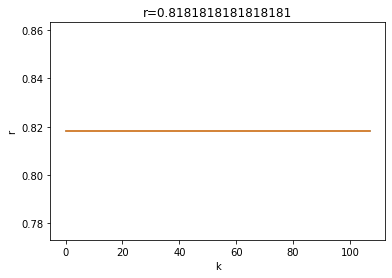

r = 0.8181818181818181


In [7]:
r_SD, rr_SD = approx_error_ratio(path_SD,[0,0],showPlot=True)
print('r =',r_SD)

And now doing the same using heavyball, we should expect faster convergence, since

$$ r = \frac{L^{1/2}-\mu^{1/2}}{L^{1/2}+\mu^{1/2}} \approx 0.51949 $$

meaning each consecutive error is only about $52\%$ of the previous error.

In [8]:
%%time
x = np.array([10,1])
path_HB = [x]
tol = 1e-8
beta = (np.sqrt(20)-np.sqrt(2))**2/(np.sqrt(20)+np.sqrt(2))**2  # optimal momentum parameter
alpha = 4/(np.sqrt(20)+np.sqrt(2))**2                           # optimal step size
max_steps = 1000
dx = df(x[0],x[1])
pk = dx*0      # first update is just gradient descent
i=0
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = dx + beta*pk
    xnew = x - alpha * pk
    path_HB.append(xnew)
    x = xnew
    i += 1
    dx = df(x[0],x[1])

path_HB = np.array(path_HB)
print(f'After {i} iterations, approximate minimum is {f(x[0],x[1])} at {x}')

After 40 iterations, approximate minimum is 1.3942883502472716e-18 at [8.49186271e-10 2.59455396e-10]
Wall time: 998 µs


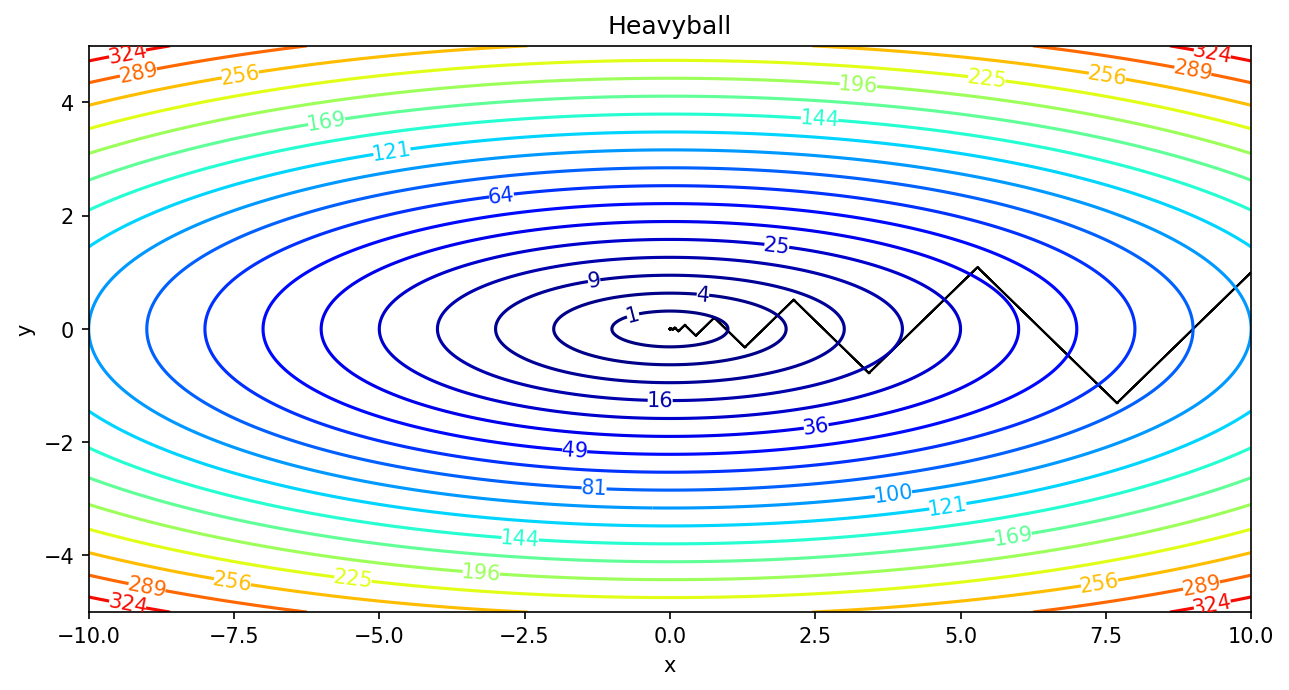

In [9]:
plot_path(path_HB,f,'Heavyball', contours=np.arange(1,20)**2)

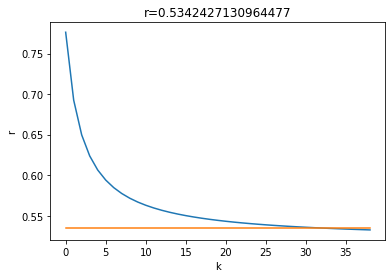

r = 0.5342427130964477


In [10]:
r_HB, rr_HB = approx_error_ratio(path_HB,[0,0],showPlot=True)
print('r =',r_HB)

In [11]:
print(rr_HB[-5:])

[0.53394175 0.53355085 0.53318055 0.53282925 0.53249553]


Of course, the above is a very ideal example where the values of $L$ and $\mu$ are easily calculable since the function is quadratic. If we apply a more sophisticated method such as Newton's, we expect convergence in one step. Even conjugate gradient, which is very similar to heavyball (indeed it can be described as heavyball with "adaptive" parameters $\alpha$ and $\beta$), is expected to converge in at most two steps since this is a function in $\mathbb{R}^2$. We show this below, choosing the Fletcher-Reeves (FR) conjugate gradient step, recognizing that for quadratic functions, this just simplifies to the linear conjugate gradient method:

In [43]:
def FR_beta(Dfk,Dfk1):
    return (Dfk1@Dfk1) / (Dfk@Dfk)

In [15]:
%%time
x = np.array([10,1])
path_FR = [x]
tol = 1e-8
max_steps = 1000
dx = df(x[0],x[1])
pk = -dx    # first step is steepest descent
i=0
while np.linalg.norm(dx)>tol and i<max_steps:    
    alpha = -(pk@dx)/(pk@(Q@pk)) # use optimal alpha
    xnew = x + alpha*pk
    dx1 = df(xnew[0],xnew[1])
    bk = FR_beta(dx,dx1)
    if i>0 and i%3 ==0:
        bk = 0    # restarting
    pk = -dx1 + bk*pk

    path_FR.append(xnew)
    x = xnew
    dx = dx1
    i += 1

path_FR=np.array(path_FR)
print(f'After {i} iterations, approximate minimum is {f(x[0],x[1])} at {x}')

After 2 iterations, approximate minimum is 3.0814879110195774e-30 at [ 0.00000000e+00 -5.55111512e-16]
Wall time: 0 ns


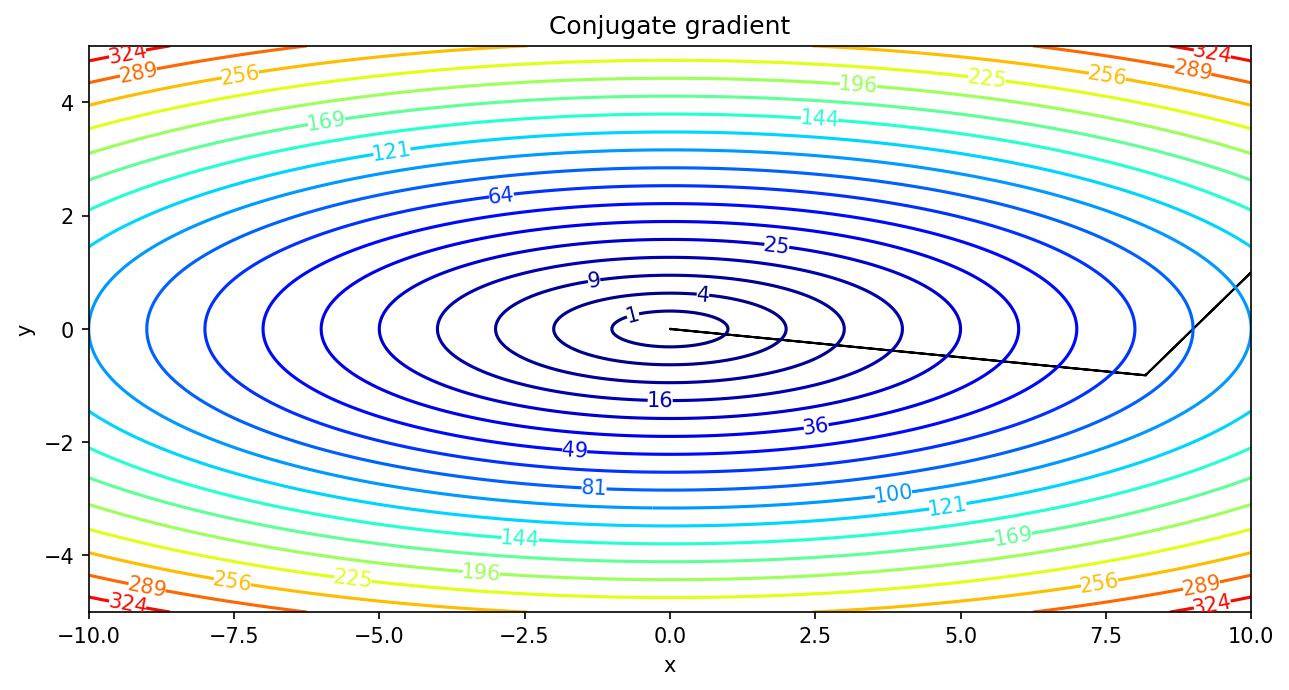

In [16]:
plot_path(path_FR,f,'Conjugate gradient', contours=np.arange(1,20)**2)

## **In summary**:

On a quadratic function, steepest descent took 109 iterations. Heavy ball method took 40 iterations. This is still linear convergence - quasi-Newton methods and Newton's method will still outperform these methods.

### Gradient Descent
$$ \begin{align*}
    \mathbf{p}_k &= \nabla f_k \\
    \mathbf{x}_{k+1} &= \mathbf{x}_k - \alpha_k \mathbf{p}_k
\end{align*} $$


* guarantees a descent direction

* If $f$ is strongly convex and strongly smooth (and all quadratic functions satisfy these conditions), then 
$$ \alpha = \frac{2}{L+\mu} \implies \frac{\|\mathbf{x}_{k+1}-\mathbf{x}^*\|}{\|\mathbf{x}_{k}-\mathbf{x}^*\|} \le \frac{L-\mu}{L + \mu} $$

### Heavy Ball Method

$$ \begin{align*}
    \mathbf{p}_k &= \nabla f_k + \beta \mathbf{p}_{k-1} \\
    \mathbf{x}_{k+1} &= \mathbf{x}_k - \alpha_k \mathbf{p}_k
\end{align*} $$
or
$$x_{k+1} = x_k - \alpha \nabla f(x_k) + \beta(x_k - x_{k-1})$$

* does not guarantee a descent direction

* If $f$ is strongly convex and strongly smooth (and all quadratic functions satisfy these conditions), then 
$$ \alpha = \frac{4}{(L^{1/2} + \mu^{1/2})^2},\quad \beta = \frac{(L^{1/2} - \mu^{1/2})^2}{(L^{1/2} + \mu^{1/2})^2} \qquad \implies\qquad  \frac{\|\mathbf{x}_{k+1}-\mathbf{x}^*\|}{\|\mathbf{x}_{k}-\mathbf{x}^*\|} \le \frac{L^{1/2}-\mu^{1/2}}{L^{1/2} + \mu^{1/2}} $$

For arbitrary functions it's hard to find $L$, $\mu$, but for quadratic functions, $L = \lambda_{\max}(Q)$, $\mu = \lambda_{\min}(Q)$.

* Generally converges faster than steepest descent.

---

## Non-quadratic example

Since conjugate gradient and heavyball are so similar, an interesting question is which performs better on non-quadratic functions. We choose the following non-quadratic function, the [Beale function](http://benchmarkfcns.xyz/benchmarkfcns/bealefcn.html), defined by

$$ f(x,y) = (1.5-x+xy)^2 + (2.25-x+xy^2)^2 + (2.625-x+xy^3)^2 $$

This function has a global minimum at $(3,0.5)$, but it has several non-ideal features like as saddle points ($\nabla f=\mathbf{0}$ but not a minimum), local suboptimal minima ($\nabla f = \mathbf{0}$ but better solutions exist), and a very flat plateau ($\nabla f\approx\mathbf{0}$ so steps are small) near the global minimum. Let's make a contour plot of this function below to investigate:

In [13]:
g = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

# numerical approximation of gradient using central difference; aint nobody got time for that
h = 1e-6
dg = lambda x, y: np.array([0.5*(g(x+h, y)-g(x-h, y))/h,
                            0.5*(g(x, y+h)-g(x, y-h))/h])

In [21]:
from matplotlib.colors import LogNorm  # useful for visualizing this function

def plot_path_Beale(path, func, title, window=[-4.5,4.5,-4.5,4.5], contours=np.logspace(-2,6,100), skip=1):
    '''Plots path defined in (N,2) array "path" on a contour plot of "func" in window "window"'''
    plt.figure(figsize=(5,5),dpi=150)
    X = np.linspace(window[0],window[1],300)
    Y = np.linspace(window[2],window[3],300)
    Xmesh, Ymesh = np.meshgrid(X,Y)
    Z = func(Xmesh,Ymesh)
    CS = plt.contourf(Xmesh, Ymesh, Z, contours, cmap='jet', norm = LogNorm())
    # contourf fills the colors. blue is lower value, red is higher value
     
    plt.axis(window)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)

    if path is not None:
        for i in range(path.shape[0]-1): # iterate through steps
            if i%skip==0:
                # only plot arrows every "skip" iterations
                plt.arrow(path[i,0],path[i,1],path[i+1,0]-path[i,0],path[i+1,1]-path[i,1],
                          color='k',length_includes_head=True)
    plt.show() 

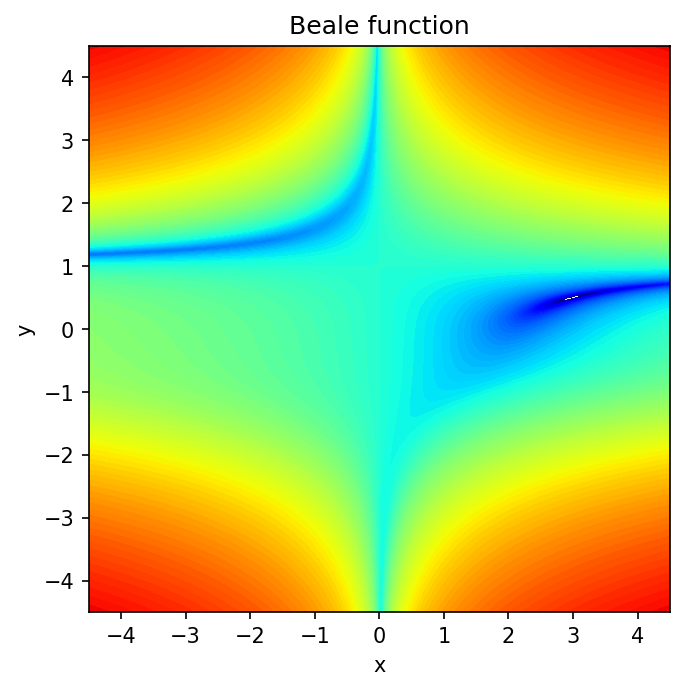

In [15]:
plot_path_Beale(None,g,'Beale function') # plot with no path to just show contour plot

First, let's explore how regular steepest descent performs on this function. We need to **determine optimal step size**, which requires computing L and $\mu$: these can be seen as the upper and lower bounds of the Hessian.

One way we could attempt to determine an optimal step size for this function would be to determine its Hessian and see if we can bound the eigenvalues. Another (lazier but much faster) method might just be to simply evaluate (or even approximate) the Hessian only at the known minimizer $(3,0.5)$ and determine eigenvalues. We'll use the latter method to quickly pick out some values for $L$, $\mu$ .

In [16]:
d2g = lambda x, y: np.array([[0.5*(dg(x+h, y)[0]-dg(x-h, y)[0])/h, 0.5*(dg(x, y+h)[0]-dg(x, y-h)[0])/h],
                             [0.5*(dg(x+h, y)[1]-dg(x-h, y)[1])/h, 0.5*(dg(x, y+h)[1]-dg(x, y-h)[1])/h]])

d2g(3,0.5)

array([[  3.15625, -11.4375 ],
       [-11.4375 ,  46.125  ]])

In [17]:
eigs, _ = np.linalg.eigh(d2g(3,0.5))
print(eigs)

print('alpha = ',4/(np.sqrt(eigs[0])+np.sqrt(eigs[1]))**2)
print('beta = ',(np.sqrt(eigs[1])-np.sqrt(eigs[0]))**2/(np.sqrt(eigs[1])+np.sqrt(eigs[0]))**2)

[ 0.30146365 48.97978636]
alpha =  0.07021675181894677
beta =  0.7301846503567466


Let's try this step size below, first with steepest descent, then do the same thing using heavyball, both starting from the initial point $(-3,-1)$:

In [18]:
%%time
x = np.array([-3,-1])
path_SD1_Beale = [x]
tol = 1e-8
alpha = 4/(np.sqrt(eigs[0])+np.sqrt(eigs[1]))**2   # optimal(?) step size
max_steps = 20000
dx = dg(x[0],x[1])
i=0
while np.linalg.norm(dx)>tol and i<max_steps:
    xnew = x - alpha*dx
    path_SD1_Beale.append(xnew)
    x = xnew
    i += 1
    dx = dg(x[0],x[1])

path_SD1_Beale = np.array(path_SD1_Beale)
print(f'After {i} iterations, approximate minimum is {g(x[0],x[1])} at {x}')

After 3 iterations, approximate minimum is 4.326272758769165e+294 at [1.51802125e+36 1.11069044e+37]
Wall time: 0 ns


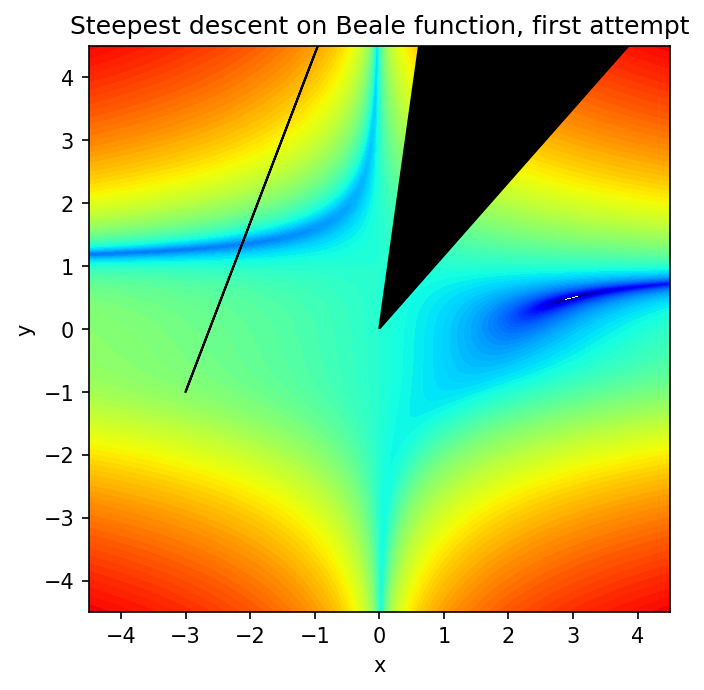

In [19]:
plot_path_Beale(path_SD1_Beale,g,'Steepest descent on Beale function, first attempt')

Well that didn't work. Does heavyball do any better?

In [22]:
%%time
x = np.array([-3,-1])
path_HB1_Beale = [x]
tol = 1e-8
beta = (np.sqrt(eigs[1])-np.sqrt(eigs[0]))**2/(np.sqrt(eigs[1])+np.sqrt(eigs[0]))**2  # optimal(?) momentum parameter
alpha = 4/(np.sqrt(eigs[0])+np.sqrt(eigs[1]))**2                                      # optimal(?) step size
max_steps = 1000
dx = dg(x[0],x[1])
pk = dx*0      # first update is just gradient descent
i=0
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -alpha*dx + beta*pk
    xnew = x + pk
    path_HB1_Beale.append(xnew)
    x = xnew
    i += 1
    dx = dg(x[0],x[1])

path_HB1_Beale = np.array(path_HB1_Beale)
print(f'After {i} iterations, approximate minimum is {g(x[0],x[1])} at {x}')

After 3 iterations, approximate minimum is 4.316374398399398e+294 at [1.51752144e+36 1.11038838e+37]
Wall time: 1 ms


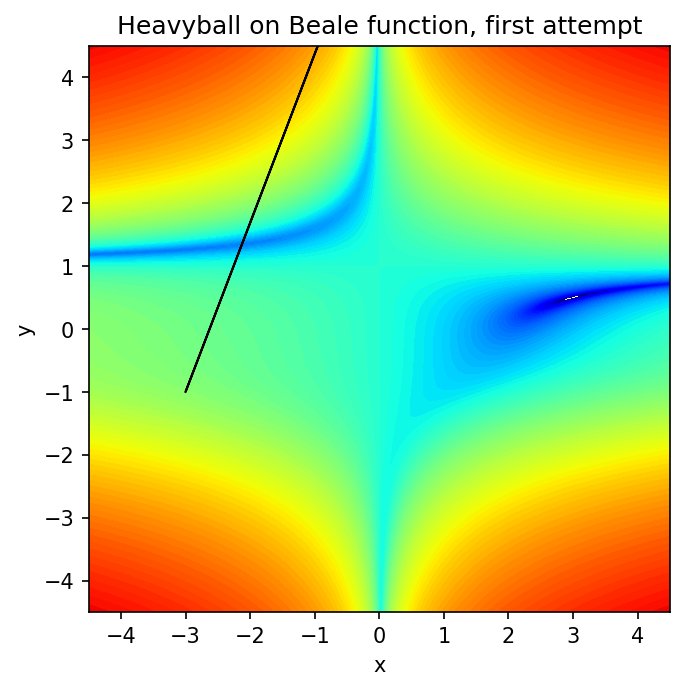

In [23]:
plot_path_Beale(path_HB1_Beale,g,'Heavyball on Beale function, first attempt')

**Heavy ball method also fails; $\alpha$ and $\beta$ are probably insufficient.** We didn't actually find $L$, $\mu$, so are bounds on the eigenvalues are much too small.

Maybe a different value of $\alpha$ and $\beta$ would be better? Rather than just guessing, let's still try to stick to some semblance of rigor and do a [Monte Carlo approximation](https://en.wikipedia.org/wiki/Monte_Carlo_method) of the largest and smallest eigenvalues in our viewing window of $[-4.5,4.5]\times[-4.5,4.5]$:

In [24]:
maxval = eigs[1]
minval = eigs[0]
for i in range(1000):
    x = np.random.uniform(-4.5,4.5,2) # generate a random point
    H = d2g(x[0],x[1])                # and evaluate the Hessian there
    tmp_eigs, _ = np.linalg.eigh(H)
    if tmp_eigs[1]>maxval:                # if eigenvalues larger or smaller, choose those
        maxval = tmp_eigs[1]
    if tmp_eigs[0]<minval:
        minval = tmp_eigs[0]
        
print('Maximum eigenvalue :',maxval,'\nMinimum eigenvalue :',minval)

Maximum eigenvalue : 263806.7921715529 
Minimum eigenvalue : -20709.772324070465


Since there are some *concave* points in our domain, we have negative eigenvalues. Promptly ignoring that, let's simply use the maximum eigenvalue from above as part of our calculations, keeping the smaller eigenvalue from the minimizer:

In [25]:
%%time
x = np.array([-3,-1])
path_SD2_Beale = [x]
tol = 1e-8
alpha = 4/(np.sqrt(eigs[0])+np.sqrt(maxval))**2   # optimal(?) step size
print('alpha = ',alpha)
max_steps = 20000
dx = dg(x[0],x[1])
i=0
while np.linalg.norm(dx)>tol and i<max_steps:
    xnew = x - alpha*dx
    path_SD2_Beale.append(xnew)
    x = xnew
    i += 1
    dx = dg(x[0],x[1])

path_SD2_Beale = np.array(path_SD2_Beale)
print(f'After {i} iterations, approximate minimum is {g(x[0],x[1])} at {x}')

alpha =  1.5130246359134054e-05
After 20000 iterations, approximate minimum is 1.4865104677744982 at [-1.02527332  1.58467398]
Wall time: 432 ms


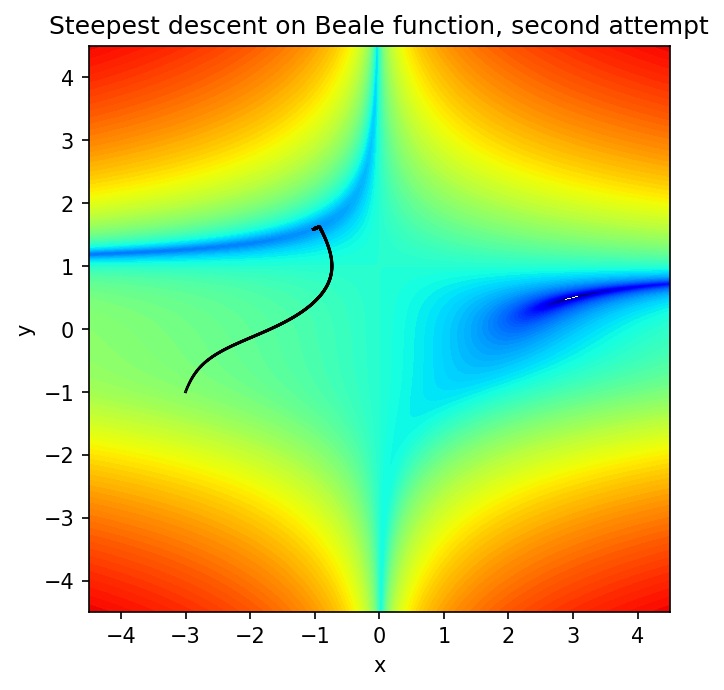

In [26]:
plot_path_Beale(path_SD2_Beale,g,'Steepest descent on Beale function, second attempt', skip=10)

**Steepest descent does descend**, but
1) This is taking way too long, and

2) We don't appear to be converging to the right place! How about heavyball?

In [30]:
%%time
x = np.array([-3,-1])
path_HB2_Beale = [x]
tol = 1e-8
beta = (np.sqrt(maxval)-np.sqrt(eigs[0]))**2/(np.sqrt(maxval)+np.sqrt(eigs[0]))**2  # optimal(?) momentum parameter
print('beta = ',beta)
alpha = 4/(np.sqrt(eigs[0])+np.sqrt(maxval))**2                                      # optimal(?) step size
print('alpha = ',alpha)
max_steps = 20000
dx = dg(x[0],x[1])
pk = dx*0      # first update is just gradient descent
i=0
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -alpha*dx + beta*pk
    xnew = x + pk
    path_HB2_Beale.append(xnew)
    x = xnew
    i += 1
    dx = dg(x[0],x[1])

path_HB2_Beale = np.array(path_HB2_Beale)
print(f'After {i} iterations, approximate minimum is {g(x[0],x[1])} at {x}')

beta =  0.9957331589938573
alpha =  1.5130246359134054e-05
After 10181 iterations, approximate minimum is 1.5963493590884856e-16 at [2.99999997 0.49999999]
Wall time: 247 ms


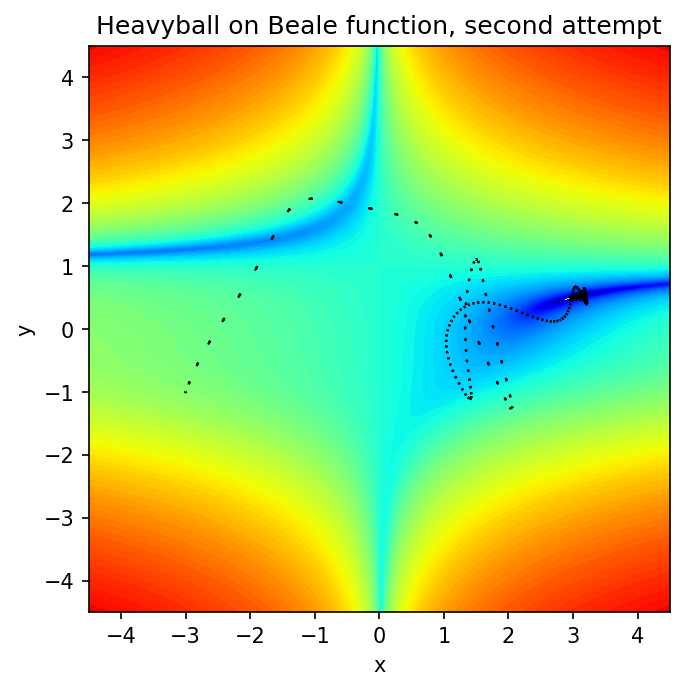

In [31]:
plot_path_Beale(path_HB2_Beale,g,'Heavyball on Beale function, second attempt', skip=10)

**Heavy ball converges properly once we set $\alpha, \beta$**. $\alpha, \beta$ still aren't optimal though; we were already close to the minimum within only 1000 steps. The last 9000+ steps were all jostling around inside the valley. We can still modify the value of $\alpha$ or $\beta$ to get better convergence.


**Looking at nonlinear conjugate method with FR update**:

Finally, let's look at the nonlinear conjugate method with an FR update. Although FR should use an adaptive $\alpha$, let's try conjugate gradient with a fixed step size to see a somewhat fair comparison:

In [34]:
%%time
x = np.array([-3,-1])
path_FR1_Beale = [x]
tol = 1e-8
alpha = 4/(np.sqrt(eigs[0])+np.sqrt(maxval))**2
max_steps = 20000
dx = dg(x[0],x[1])
pk = -dx    # first step is steepest descent
i=0
while np.linalg.norm(dx)>tol and i<max_steps:
    xnew = x + alpha*pk
    dx1 = dg(xnew[0],xnew[1])
    bk = FR_beta(dx,dx1)    # still use adaptive beta
    if i>0 and i%3 ==0:
        bk = 0    # restarting
    pk = -dx1 + bk*pk

    path_FR1_Beale.append(xnew)
    x = xnew
    dx = dx1
    i += 1

path_FR1_Beale=np.array(path_FR1_Beale)
print(f'After {i} iterations, approximate minimum is {g(x[0],x[1])} at {x}')

After 20000 iterations, approximate minimum is 1.3781214255819183 at [-1.19798166  1.52479869]
Wall time: 570 ms


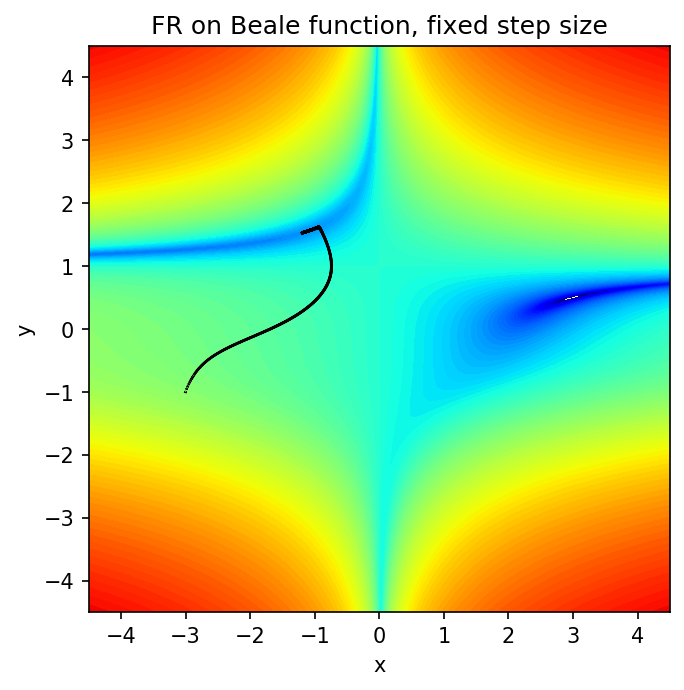

In [35]:
plot_path_Beale(path_FR1_Beale,g,'FR on Beale function, fixed step size', skip=10)

With fixed step size, even if $\beta$ is calculated adaptively, conjugate gradient does not perform well.

**If $\alpha$ is computed with backtracking, $\beta$ is computed adaptively:**


In [40]:
def WolfeI(alpha,f,x,dx,p,c1=0.1):
    '''Return True/False if Wolfe condition I is satisfied for the given alpha'''
    LHS = f(x[0]+alpha*p[0], x[1]+alpha*p[1])
    RHS = f(x[0],x[1])+c1*alpha*np.dot(dx,p)
    return LHS <= RHS

In [41]:
%%time
x = np.array([-3,-1])
path_FR2_Beale = [x]
tol = 1e-8
rho = 0.9  # rho for backtracking
max_steps = 10000
dx = dg(x[0],x[1])
pk = -dx    # first step is steepest descent
i=0
while np.linalg.norm(dx)>tol and i<max_steps:
    # backtracking
    alpha = 1
    while not WolfeI(alpha,g,x,dx,pk) and alpha>1e-5: # lower bound on alpha attempts to force Wolfe II
        alpha *= rho
        
    xnew = x + alpha*pk
    dx1 = dg(xnew[0],xnew[1])
    bk = FR_beta(dx,dx1)
    if i>0 and i%3 ==0:
        bk = 0    # restarting
    pk = -dx1 + bk*pk

    path_FR2_Beale.append(xnew)
    x = xnew
    dx = dx1
    i += 1

path_FR2_Beale=np.array(path_FR2_Beale)
print(f'After {i} iterations, approximate minimum is {g(x[0],x[1])} at {x}')

After 359 iterations, approximate minimum is 7.690500855969876e-18 at [2.99999999 0.5       ]
Wall time: 98 ms


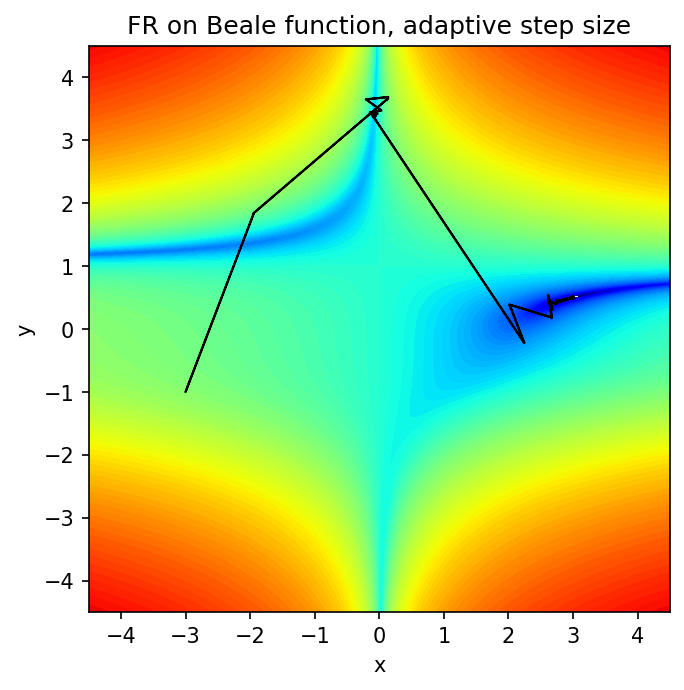

In [42]:
plot_path_Beale(path_FR2_Beale,g,'FR on Beale function, adaptive step size')

You can play around with the different parameters above to see how they affect convergence. What happens if we change $\rho$ in backtracking? What about $c_1$ in the Wolfe I condition? Especially with such a non-convex function, this is an open question.